In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

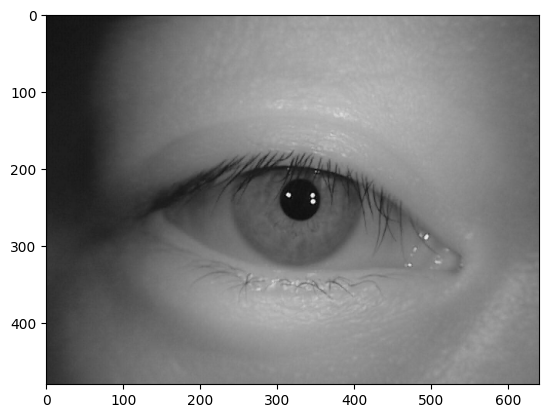

In [2]:
def read_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    return img

img_path = r'Iris-Dataset\CASIA-IrisV2\device1\0000\0000_000.bmp'
img = read_image(img_path)
plt.imshow(img, cmap='gray')
plt.show()

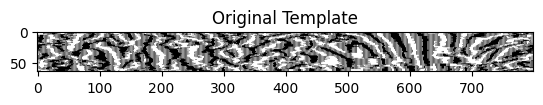

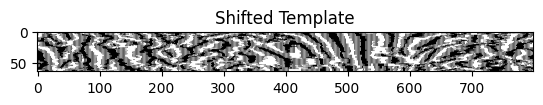

(64, 800)

In [3]:
# Shift the bits of the template
def shiftbits_ham(template, noshifts):
    templatenew = np.zeros(template.shape)
    width = template.shape[1]
    s = 2 * np.abs(noshifts)
    p = width - s

    # If no shift is needed, return the original template
    if noshifts == 0:
        templatenew = template

    # If the shift is negative, shift the bits to the left
    elif noshifts < 0:
        x = np.arange(p)
        templatenew[:, x] = template[:, s + x]
        x = np.arange(p, width)
        templatenew[:, x] = template[:, x - p]

    # If the shift is positive, shift the bits to the right
    else:
        x = np.arange(s, width)
        templatenew[:, x] = template[:, x - s]
        x = np.arange(s)
        templatenew[:, x] = template[:, p + x]

    return templatenew

template = cv2.imread('Iris-Dataset/CASIA-IrisV2/device2/0000_template/0000_000.bmp', cv2.IMREAD_GRAYSCALE)

plt.imshow(template, cmap='gray')
plt.title('Original Template')
plt.show()

# Shift 50 bits to the right
template_shifted = shiftbits_ham(template, -50)

plt.imshow(template_shifted, cmap='gray')
plt.title('Shifted Template')
plt.show()
template.shape

Hamming distance

In [4]:
def HammingDistance(template1, template2):
    hd = np.nan

    hd_all = [] # contain all hamming distance every shift

    bitsdiff_arr = np.empty(17, dtype=np.float64)
    totalbits_arr = np.empty(17, dtype=np.float64)

    for i, shifts in enumerate(range(-8, 9)):
        template1s = shiftbits_ham(template1, shifts)
    
        totalbits_arr[i] = template1s.size

        C = np.logical_xor(template1s, template2)
        bitsdiff_arr[i] = np.sum(C == 1)

    for i, totalbits in enumerate(totalbits_arr):
        if totalbits == 0:
            hd = np.nan
        else:
            hd1 = bitsdiff_arr[i] / totalbits

            hd_all.append(hd1)

            # select the minimum hamming distance
            if hd1 < hd or np.isnan(hd):
                hd = hd1

    return hd, hd_all

template1 = read_image(r'Iris-Dataset/CASIA-IrisV2/device2/0000_template/0000_000.bmp')
template2 = read_image(r'Iris-Dataset/CASIA-IrisV2/device2/0000_template/0000_000.bmp')
print(HammingDistance(template1, template2)[1])
print(len(HammingDistance(template1, template2)[1]))


[np.float64(0.6456640625), np.float64(0.624453125), np.float64(0.581484375), np.float64(0.516640625), np.float64(0.4355078125), np.float64(0.339765625), np.float64(0.2331640625), np.float64(0.1186328125), np.float64(0.0), np.float64(0.1186328125), np.float64(0.2331640625), np.float64(0.339765625), np.float64(0.4355078125), np.float64(0.516640625), np.float64(0.581484375), np.float64(0.624453125), np.float64(0.6456640625)]
17


In [5]:
def HammingDistance(template1, template2):
    hd = np.nan

    hd_all = [] # contain all hamming distance every shift

    bitsdiff_arr = np.empty(17, dtype=np.float64)
    totalbits_arr = np.empty(17, dtype=np.float64)

    for i, shifts in enumerate(range(-8, 9)):
        template1s = shiftbits_ham(template1, shifts)
    
        totalbits_arr[i] = template1s.size

        C = np.logical_xor(template1s, template2)
        bitsdiff_arr[i] = np.sum(C == 1)
    # print(C.shape)


    for i, totalbits in enumerate(totalbits_arr):
        if totalbits == 0:
            hd = np.nan
        else:
            hd1 = bitsdiff_arr[i] / totalbits

            hd_all.append(hd1)

            # select the minimum hamming distance
            if hd1 < hd or np.isnan(hd):
                hd = hd1
    return hd, hd_all

# template1 = read_image(r'Iris-Dataset/CASIA-IrisV2/device2/0000_template/0000_000.bmp')
template1 = cv2.imread(f'Iris-Dataset/CASIA-IrisV2/device2/0000_template/0000_000.bmp', cv2.IMREAD_GRAYSCALE)
# template2 = read_image(r'Iris-Dataset/CASIA-IrisV2/device2/0000_template/0000_000.bmp')
template2 = cv2.imread(f'Iris-Dataset/CASIA-IrisV2/device2/0000_template/0000_000.bmp', cv2.IMREAD_GRAYSCALE)
result = HammingDistance(template1, template2)
print(result[0])
print(result[1])
print(len(result[1]))


0.0
[np.float64(0.6456640625), np.float64(0.624453125), np.float64(0.581484375), np.float64(0.516640625), np.float64(0.4355078125), np.float64(0.339765625), np.float64(0.2331640625), np.float64(0.1186328125), np.float64(0.0), np.float64(0.1186328125), np.float64(0.2331640625), np.float64(0.339765625), np.float64(0.4355078125), np.float64(0.516640625), np.float64(0.581484375), np.float64(0.624453125), np.float64(0.6456640625)]
17


In [6]:

print(len(HammingDistance(template1, template2)[1]))

17


Jaccard distance

In [7]:
from scipy.spatial import distance

def jaccard_distance(template1, template2):
    # Flatten the templates to 1D arrays
    template1_flat = template1.flatten()
    template2_flat = template2.flatten()

    # Calculate Jaccard distance
    dist = distance.jaccard(template1_flat, template2_flat)
    
    return dist

template1 = read_image(r'Iris-Dataset/CASIA-IrisV2/device2/0000_template/0000_000.bmp')
template2 = read_image(r'Iris-Dataset/CASIA-IrisV2/device2/0000_template/0000_001.bmp')
# template2 = read_image(r'Iris-Dataset/CASIA-IrisV2/device1/0000/0000_001.bmp')
print("Jaccard Distance:", jaccard_distance(template1, template2))

Jaccard Distance: 0.4201923372353827


In [8]:
# Jaccard distance for shifted templates between -8 and 8,-> 17 shift
def jaccard_distance_shifted(template1, template2):
    jaccard_distances = []

    for shifts in range(-8, 9):
        template1_shifted = shiftbits_ham(template1, shifts)
        dist = jaccard_distance(template1_shifted, template2)
        jaccard_distances.append(dist)

    return jaccard_distances

# Calculate Jaccard distances for shifted templates
template1 = read_image(r'Iris-Dataset/CASIA-IrisV2/device2/0000_template/0000_000.bmp')
template2 = read_image(r'Iris-Dataset/CASIA-IrisV2/device2/0000_template/0000_001.bmp')
jaccard_distances = jaccard_distance_shifted(template1, template2)
print(jaccard_distances)
print(len(jaccard_distances))

[np.float64(0.7432970793107663), np.float64(0.729761110699375), np.float64(0.7052276390008058), np.float64(0.667789408228832), np.float64(0.6160844054475965), np.float64(0.5558364228738344), np.float64(0.49293627996951755), np.float64(0.44036641591846637), np.float64(0.4201923372353827), np.float64(0.44414185427257324), np.float64(0.4955379348684788), np.float64(0.556120299907332), np.float64(0.6148541256970448), np.float64(0.6651609553478712), np.float64(0.7026140492531288), np.float64(0.7280013853499245), np.float64(0.74209805264703)]
17


Pearson Correlation Coefficient

In [9]:
from scipy import stats
def pearson_correlation(template1, template2):
    # Flatten the templates to 1D arrays
    template1_flat = template1.flatten()
    template2_flat = template2.flatten()

    # Calculate Pearson correlation coefficient
    corr, _ = stats.pearsonr(template1_flat, template2_flat)
    
    return corr

template1 = read_image(r'Iris-Dataset/CASIA-IrisV2/device2/0000_template/0000_000.bmp')
template2 = read_image(r'Iris-Dataset/CASIA-IrisV2/device2/0000_template/0000_001.bmp')
print(pearson_correlation(template1, template2))

0.4657725513562355


In [10]:
def pearson_correlation_shifted(template1, template2):
    correlations = []

    for shifts in range(-8, 9):
        template1_shifted = shiftbits_ham(template1, shifts)
        corr = round(pearson_correlation(template1_shifted, template2), 12)
        correlations.append(corr)

    return correlations

# Calculate Pearson correlations for shifted templates
template1 = read_image(r'Iris-Dataset/CASIA-IrisV2/device2/0000_template/0000_000.bmp')
template2 = read_image(r'Iris-Dataset/CASIA-IrisV2/device2/0000_template/0000_001.bmp')
pearson_correlations = pearson_correlation_shifted(template1, template2)
print(pearson_correlations)
print(len(pearson_correlations))

[np.float64(-0.18798974062), np.float64(-0.153926600168), np.float64(-0.094003598501), np.float64(-0.006814459179), np.float64(0.105843909012), np.float64(0.226939935848), np.float64(0.343035868673), np.float64(0.432881307938), np.float64(0.465772551356), np.float64(0.426631190424), np.float64(0.338426407006), np.float64(0.226393050566), np.float64(0.108422082487), np.float64(-0.000876847541), np.float64(-0.087753480987), np.float64(-0.149551517908), np.float64(-0.184942808332)]
17


In [11]:
def fillzero(num):
    if num < 10 and num >= 0:
        return '0' + str(num)
    else:
        return str(num)
    

In [12]:
from concurrent.futures import ThreadPoolExecutor
import time
import pandas as pd

In [20]:
total_t_using = 0
count = 0
# template1 = read_image(r'Iris-Dataset/CASIA-IrisV2/device2/0000_tempCASIAlate/0000_000.bmp')
template1 = cv2.imread(f'Iris-Dataset/CASIA-IrisV2/device2/0000_template/0000_000.bmp', cv2.IMREAD_GRAYSCALE)

for i in range(20):
    # template2 = read_image(f'Iris-Dataset/CASIA-IrisV2/device2/0000_template/0000_0{fillzero(i)}.bmp')
    template2 = cv2.imread(f'Iris-Dataset/CASIA-IrisV2/device2/0000_template/0000_0{fillzero(i)}.bmp', cv2.IMREAD_GRAYSCALE)

    start_t = time.time()
    hd_df = HammingDistance(template1, template2)
    jc_df = jaccard_distance_shifted(template1, template2)
    ps_df = pearson_correlation_shifted(template1, template2)
    flattened_data = pd.DataFrame([item for sublist in [hd_df[1], jc_df, ps_df] for item in sublist]).T
    total_t_using += time.time() - start_t
    count += 1

print("total time using:",total_t_using,"sec")
print(f"average: {(total_t_using/count)*1000} ms/compare")
print(f"total compare {count} time")
print(flattened_data)

total time using: 0.7303073406219482 sec
average: 36.51536703109741 ms/compare
total compare 20 time
         0         1         2         3         4         5         6   \
0  0.539023  0.548281  0.554297  0.558359  0.553633  0.540937  0.518398   

         7         8         9   ...        41        42        43        44  \
0  0.489961  0.458516  0.428516  ...  0.020084  0.082975  0.142975  0.192194   

         45        46        47        48        49        50  
0  0.222351  0.221023  0.180554  0.118131  0.052037 -0.006635  

[1 rows x 51 columns]


In [14]:
def get_flattened_mtt(tem1, tem2):
    with ThreadPoolExecutor() as executor:
        hd = executor.submit(HammingDistance, tem1, tem2)
        jc = executor.submit(jaccard_distance_shifted, tem1, tem2)
        ps = executor.submit(pearson_correlation_shifted, tem1, tem2)

        hd_df = hd.result()
        jc_df = jc.result()
        ps_df = ps.result()
        return pd.DataFrame([item for sublist in [hd_df[1], jc_df, ps_df] for item in sublist]).T

total_t_using = 0
count = 0
# template1 = read_image(r'Iris-Dataset/CASIA-IrisV2/device2/0000_template/0000_000.bmp')
template1 = cv2.imread(f'Iris-Dataset/CASIA-IrisV2/device2/0000_template/0000_000.bmp', cv2.IMREAD_GRAYSCALE)

for i in range(20):
    # template2 = read_image(f'Iris-Dataset/CASIA-IrisV2/device2/0000_template/0000_0{fillzero(i)}.bmp')
    template2 = cv2.imread(f'Iris-Dataset/CASIA-IrisV2/device2/0000_template/0000_0{fillzero(i)}.bmp', cv2.IMREAD_GRAYSCALE)

    start_t = time.time()
    flattened_data = get_flattened_mtt(template1, template2)
    total_t_using += time.time() - start_t
    count += 1
    
print("total time using:",total_t_using,"sec")
print(f"average: {(total_t_using/count)*1000} ms/compare")
print(f"total compare {count} time")
print(flattened_data)

total time using: 0.5982348918914795 sec
average: 29.911744594573975 ms/compare
total compare 20 time
         0         1         2         3         4         5         6   \
0  0.539023  0.548281  0.554297  0.558359  0.553633  0.540937  0.518398   

         7         8         9   ...        41        42        43        44  \
0  0.489961  0.458516  0.428516  ...  0.020084  0.082975  0.142975  0.192194   

         45        46        47        48        49        50  
0  0.222351  0.221023  0.180554  0.118131  0.052037 -0.006635  

[1 rows x 51 columns]
